# **Ejercicio 1**

Crea una gráfica interactiva (scatter plot de plotly)

Tiene que verse TODOS los puntos

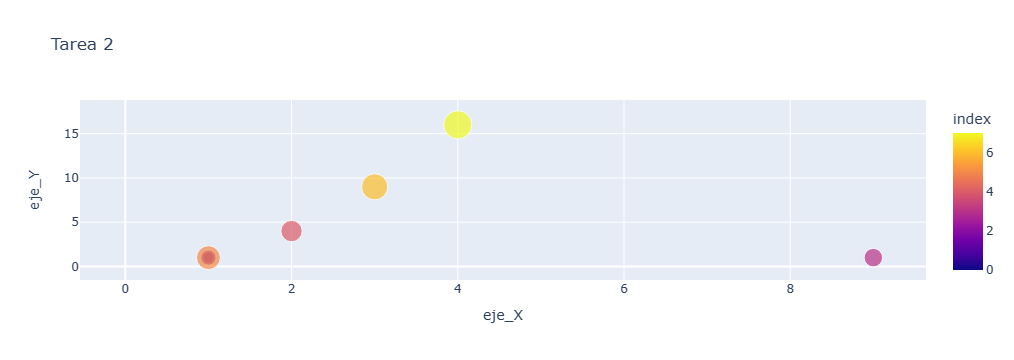

In [1]:
import plotly.express as px
import pandas as pd
import numpy as np

lst1 = [0, 1, 1, 9, 2, 1, 3, 4]
lst2 = [0, 1, 1, 1, 4, 1, 9, 16]
df = pd.DataFrame(list(zip(lst1,lst2)), columns = ['eje_X','eje_Y'])

fig = px.scatter(df, x="eje_X", y="eje_Y",
                 color=df.index,
                 hover_data=['eje_Y'], 
                 size=df.index, 
                 title="Tarea 2")
fig.show()

# Ejercicio 2

Convertir todos los valores del data set https://archive.ics.uci.edu/ml/datasets/Car+Evaluation a:

Mayúsculas

Traducción al español 
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html

In [383]:
import pandas as pd
import numpy as np

In [386]:
# asignar data a un df
df1 = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data" , encoding = "utf-8")

In [387]:
# ver data
print(df1.head()) 
print(df1.shape)
print(df1.dtypes)

   vhigh vhigh.1  2 2.1  small   low  unacc
0  vhigh   vhigh  2   2  small   med  unacc
1  vhigh   vhigh  2   2  small  high  unacc
2  vhigh   vhigh  2   2    med   low  unacc
3  vhigh   vhigh  2   2    med   med  unacc
4  vhigh   vhigh  2   2    med  high  unacc
(1727, 7)
vhigh      object
vhigh.1    object
2          object
2.1        object
small      object
low        object
unacc      object
dtype: object


In [388]:
# eliminar columnas "numéricas-str"
df2 = df1.drop(['2','2.1'],axis=1)    
df2.head()

vhigh vhigh.1  small   low  unacc
0  vhigh   vhigh  small   med  unacc
1  vhigh   vhigh  small  high  unacc
2  vhigh   vhigh    med   low  unacc
3  vhigh   vhigh    med   med  unacc
4  vhigh   vhigh    med  high  unacc

In [389]:
# convertir a mayúsculas
df3 = df2.apply(lambda x: x.astype(str).str.upper())
df3.head()

vhigh vhigh.1  small   low  unacc
0  VHIGH   VHIGH  SMALL   MED  UNACC
1  VHIGH   VHIGH  SMALL  HIGH  UNACC
2  VHIGH   VHIGH    MED   LOW  UNACC
3  VHIGH   VHIGH    MED   MED  UNACC
4  VHIGH   VHIGH    MED  HIGH  UNACC

In [390]:
# obtener los datos únicos para traducir
unique = df3.apply(lambda pd: pd.unique())
unique

vhigh        [VHIGH, HIGH, MED, LOW]
vhigh.1      [VHIGH, HIGH, MED, LOW]
small              [SMALL, MED, BIG]
low                 [MED, HIGH, LOW]
unacc      [UNACC, ACC, VGOOD, GOOD]
dtype: object

In [391]:
# traducir al español con replace, utilizar {dict}
df_4 = df3.astype(str).replace({'SMALL':'PEQUEÑO','VHIGH':'MUY ALTO','HIGH':'ALTO','LOW':'BAJO','UNACC':'INACEPTABLE','GOOD':'BUENO', 'BIG':'GRANDE', 'VGOOD':'MUY BIEN','MED':'MEDIANO'})
df_4

vhigh   vhigh.1    small      low        unacc
0     MUY ALTO  MUY ALTO  PEQUEÑO  MEDIANO  INACEPTABLE
1     MUY ALTO  MUY ALTO  PEQUEÑO     ALTO  INACEPTABLE
2     MUY ALTO  MUY ALTO  MEDIANO     BAJO  INACEPTABLE
3     MUY ALTO  MUY ALTO  MEDIANO  MEDIANO  INACEPTABLE
4     MUY ALTO  MUY ALTO  MEDIANO     ALTO  INACEPTABLE
...        ...       ...      ...      ...          ...
1722      BAJO      BAJO  MEDIANO  MEDIANO        BUENO
1723      BAJO      BAJO  MEDIANO     ALTO     MUY BIEN
1724      BAJO      BAJO   GRANDE     BAJO  INACEPTABLE
1725      BAJO      BAJO   GRANDE  MEDIANO        BUENO
1726      BAJO      BAJO   GRANDE     ALTO     MUY BIEN

[1727 rows x 5 columns]

# Ejercicio 3

Calcula los eigenvalores y eigenvectores del algoritmo de PCA para la base de datos de Iris o de tu agrado. Para lograr todos los puntos es necesario entender el algoritmo y explicarlo.

Este ejercicio no tiene valor si la función que se usa para hacer PCA no es creada por el equipo.

ANÁLISIS DE COMPONENTES PRINCIPALES (ACP)

#### ¿ Qué es el ACP ?
	Es una técnica de aprendizaje no supervisado
	En estadística se clasifica como análisis multivariado descriptivo
#### ¿ Para qué sirve?
	Reducir un conjunto de datos numéricos en términos de nuevos grupos-variables latentes o CP
#### ¿ Cómo lo hace?
	A través de una transformación lineal de un espacio vectorial

#### ¿ Dónde se aplica ?
	-Como parte del EDA			-Para construir modelos predictivos

PASOS

1.Estandarizar los datos, media = 0; desviación típica = 1 

2.Calculo de los CP

  -eigenvectores-autovectores-vectores propios = CP
  
  -eigenvalores o valores propio = % de información
  
4.Visualizar los resultados 

In [394]:
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA

import pandas as pd
import numpy as np
import numpy.linalg as la
import seaborn as sns
import matplotlib.pyplot as plt

In [412]:
def elPCA(ncomponentes):
    url = ("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")

    df = pd.read_csv(url , header = None)
    nombre_col = ["longitud_sepalo" , "ancho_sepalo" , "longitud_petado" , "ancho_petalo" , "clase" ]
    df.columns = nombre_col
    X_cols = ["longitud_sepalo" , "ancho_sepalo" , "longitud_petado" , "ancho_petalo" ]

    if (ncomponentes == 3) or (ncomponentes == 2):  
        
        ss = StandardScaler()
        df[X_cols] = ss.fit_transform(df[X_cols])                               # PASO 1, estandrizar
        Pca = PCA(n_components = ncomponentes , random_state = 42 )             # PASO 2, crea CP
        pca_barras = Pca.fit_transform(df[X_cols])                              # recibe los valores para graficar 
    

        if (ncomponentes == 3):
                # Varianza por componente
                print("Varianza por Componente...: "+str(Pca.explained_variance_ratio_))        # VARIANZA por componente

                print("-=-=-=-=-=-")

                # Varianza total de n Componentes
                print("Varianza total de 3 Componentes...: "+str(Pca.explained_variance_ratio_.sum()))     # VARIANZA TOTAL 

                return sns.barplot(x=["PCA1" , "PCA2" , "PCA3"] , y=Pca.explained_variance_ratio_ )        # Gráfica

        if (ncomponentes == 2):

                # Varianza por componente
                print("Varianza por Componente...: "+str(Pca.explained_variance_ratio_))

                print("-=-=-=-=-=-")

                # Varianza total de n Componentes
                print("Varianza total de 2 Componentes...: "+str(Pca.explained_variance_ratio_.sum()))

                return sns.barplot(x=["PCA1" , "PCA2"] , y=Pca.explained_variance_ratio_ )                # Gráfica

    else:
        print("Solo se permite graficar 2 o 3 componentes, Gracias!")

Varianza por Componente...: [0.72770452 0.23030523]
-=-=-=-=-=-
Varianza total de 2 Componentes...: 0.9580097536148199


<AxesSubplot:>

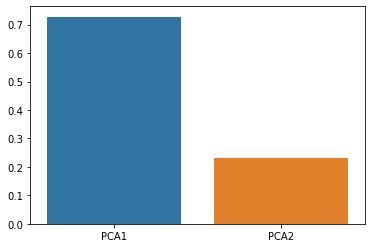

In [417]:
elPCA(2)

# Ejercicio 4
Calcula la matriz inversa

In [76]:
import numpy as np

In [77]:
m = np.array([[1 , 2 , 4] , [4 , 5 , 6] , [8 , 10 ,12]])
m

array([[ 1,  2,  4],
       [ 4,  5,  6],
       [ 8, 10, 12]])

In [78]:
# verificar si tiene determinante 0
np.linalg.det(m)             

0.0

In [79]:
# obtiene la matriz inversa con determinante 0
# "pinv" da la pseudo-inversa de una matriz
np.linalg.pinv(m)

array([[-0.43352601,  0.05317919,  0.10635838],
       [-0.20809249,  0.03352601,  0.06705202],
       [ 0.46242775, -0.0300578 , -0.06011561]])

Nota: una matriz cuadrada que no es invertible se llama singular o degenerada. Es singular si y solo si su determinante es cero (no tiene solución).

Una matriz será siempre cero (nulo) si la matriz:

a) contiene dos filas o columnas iguales, 

b) si los elementos de una fila o columna son todo ceros, o 

c) si los elementos de una fila o columna son una combinación lineal de las demás.

La pseudoinversa da una solución de «ajuste óptimo» (por cuadrados mínimos) de un sistema de ecuaciones lineales que no posee solución.

# Ejercicio 5 


Realiza un análisis descriptivo de los datos Cancer Wisconsin

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# cargar datos desde internet 
databc = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data' , encoding='utf-8')

### Entender los datos

In [44]:
# total de datos en la base
databc.shape

(698, 11)

In [45]:
# ver nombre de las columnas
databc.keys()

Index(['1000025', '5', '1', '1.1', '1.2', '2', '1.3', '3', '1.4', '1.5',
       '2.1'],
      dtype='object')

In [46]:
# macro datos
databc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   1000025  698 non-null    int64 
 1   5        698 non-null    int64 
 2   1        698 non-null    int64 
 3   1.1      698 non-null    int64 
 4   1.2      698 non-null    int64 
 5   2        698 non-null    int64 
 6   1.3      698 non-null    object
 7   3        698 non-null    int64 
 8   1.4      698 non-null    int64 
 9   1.5      698 non-null    int64 
 10  2.1      698 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [47]:
# primeras filas 
databc.head()

1000025  5   1  1.1  1.2  2 1.3  3  1.4  1.5  2.1
0  1002945  5   4    4    5  7  10  3    2    1    2
1  1015425  3   1    1    1  2   2  3    1    1    2
2  1016277  6   8    8    1  3   4  3    7    1    2
3  1017023  4   1    1    3  2   1  3    1    1    2
4  1017122  8  10   10    8  7  10  9    7    1    4

In [7]:
databc.head(3)

1000025  5  1  1.1  1.2  2 1.3  3  1.4  1.5  2.1
0  1002945  5  4    4    5  7  10  3    2    1    2
1  1015425  3  1    1    1  2   2  3    1    1    2
2  1016277  6  8    8    1  3   4  3    7    1    2

In [48]:
# estadística resumen 
databc.describe()

1000025           5           1         1.1         1.2  \
count  6.980000e+02  698.000000  698.000000  698.000000  698.000000   
mean   1.071807e+06    4.416905    3.137536    3.210602    2.809456   
std    6.175323e+05    2.817673    3.052575    2.972867    2.856606   
min    6.163400e+04    1.000000    1.000000    1.000000    1.000000   
25%    8.702582e+05    2.000000    1.000000    1.000000    1.000000   
50%    1.171710e+06    4.000000    1.000000    1.000000    1.000000   
75%    1.238354e+06    6.000000    5.000000    5.000000    4.000000   
max    1.345435e+07   10.000000   10.000000   10.000000   10.000000   

                2           3         1.4         1.5         2.1  
count  698.000000  698.000000  698.000000  698.000000  698.000000  
mean     3.217765    3.438395    2.869628    1.590258    2.690544  
std      2.215408    2.440056    3.055004    1.716162    0.951596  
min      1.000000    1.000000    1.000000    1.000000    2.000000  
25%      2.000000    2.000000    1.000000    1.000000    2.000000  
50%      2.000000    3.000000    1.000000    1.000000    2.000000  
75%      4.000000    5.000000    4.000000    1.000000    4.000000  
max     10.000000   10.000000   10.000000   10.000000    4.000000

### Conteo missings, mostrar tipo de dato

In [49]:
# suma los nulos por columna
databc.isnull().sum() 

1000025    0
5          0
1          0
1.1        0
1.2        0
2          0
1.3        0
3          0
1.4        0
1.5        0
2.1        0
dtype: int64

In [50]:
# tipo de dato
databc.dtypes

1000025     int64
5           int64
1           int64
1.1         int64
1.2         int64
2           int64
1.3        object
3           int64
1.4         int64
1.5         int64
2.1         int64
dtype: object

### Filtrar datos 

In [51]:
#seleccionar un rango de filas = 1a. y 2da. fila
databc.iloc[1:3]

1000025  5  1  1.1  1.2  2 1.3  3  1.4  1.5  2.1
1  1015425  3  1    1    1  2   2  3    1    1    2
2  1016277  6  8    8    1  3   4  3    7    1    2

In [52]:
# muestra las últimas 5 filas 
databc.iloc[-5:]

1000025  5   1  1.1  1.2  2 1.3   3  1.4  1.5  2.1
693   776715  3   1    1    1  3   2   1    1    1    2
694   841769  2   1    1    1  2   1   1    1    1    2
695   888820  5  10   10    3  7   3   8   10    2    4
696   897471  4   8    6    4  3   4  10    6    1    4
697   897471  4   8    8    5  4   5  10    4    1    4

In [53]:
# selecciona una fila
databc.iloc[8]

1000025    1033078
5                4
1                2
1.1              1
1.2              1
2                2
1.3              1
3                2
1.4              1
1.5              1
2.1              2
Name: 8, dtype: object

### 3 Gráficas relevantes

In [54]:
# renombrar columnas 
databc1 = databc.rename(columns={"1000025":"codigo" , "5": "clump_thickness" , "1":"size_uniformity" , "1.1":"shape_uniformity" , "1.2":"marginal_adhesion" , "2":"epithelial_size" , "1.3": "bare_nucleoli" , "3":"bland_chromatin", "1.4": "normal_nucleoli" , "1.5":"mitoses" , "2.1": "class"})
databc1.head()

codigo  clump_thickness  size_uniformity  shape_uniformity  \
0  1002945                5                4                 4   
1  1015425                3                1                 1   
2  1016277                6                8                 8   
3  1017023                4                1                 1   
4  1017122                8               10                10   

   marginal_adhesion  epithelial_size bare_nucleoli  bland_chromatin  \
0                  5                7            10                3   
1                  1                2             2                3   
2                  1                3             4                3   
3                  3                2             1                3   
4                  8                7            10                9   

   normal_nucleoli  mitoses  class  
0                2        1      2  
1                1        1      2  
2                7        1      2  
3                1        1      2  
4                7        1      4

<AxesSubplot:>

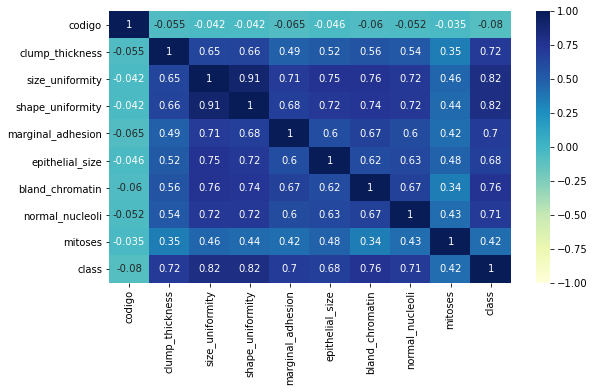

In [55]:
# Gráafica 1: muestra la relación entre las variables
graf1 = plt.figure(figsize=(9,5))
sns.heatmap(databc1.corr(),annot=True,cmap='YlGnBu',vmax=1.0,vmin=-1.0)

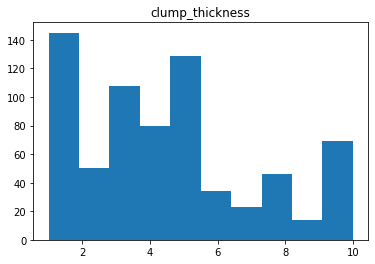

In [41]:
# Gráfica 2: espesor aglomerado = agrupación de celulas cancerosas que se multiplican, por nivel 
plt.hist(databc1['clump_thickness'])
plt.title('clump_thickness')
plt.show()

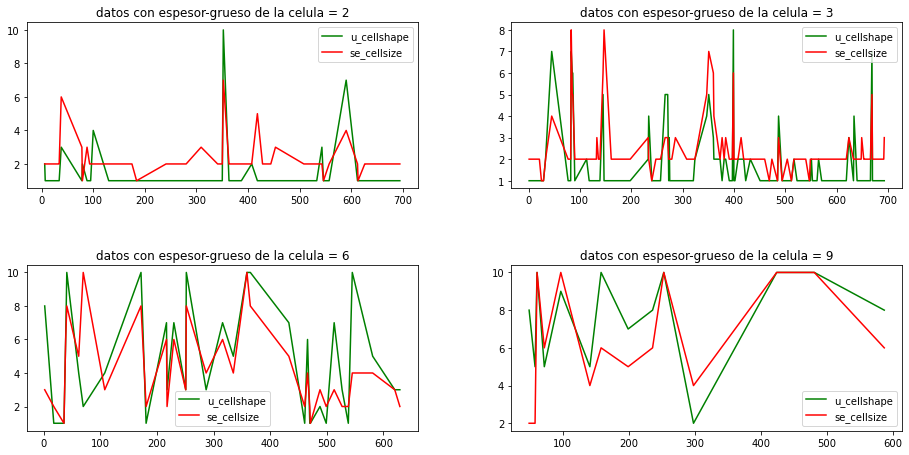

In [419]:
# Gráfica 3: Compara forma(U_CellShape) y tamaño(SE_CellSize) de la celula segun espesor-grueso de la célula (clump_thickness)

# seleccionar columnas a utilizas
df_final=databc.rename(columns={"1000025":"id" , "5": "clump_thickness", "1": "U_CellSize", "1.1":"U_CellShape", "2":"SE_CellSize"})

# compara forma con tamaño, dependiendo el espesor-grueso de la célula
df2 = df_final[df_final["clump_thickness"]==2]        # espesor-grueso de la célula = 2  
u_cellshape = df2["U_CellShape"]
se_cellsize = df2["SE_CellSize"]

fig1 = plt.figure(1)
plt.subplot(221)
plt.title("datos con espesor-grueso de la celula = 2")
plt.plot(u_cellshape, label='u_cellshape', color='green')
plt.plot(se_cellsize, label='se_cellsize', color='red')
plt.legend()

df3 = df_final[df_final["clump_thickness"]==3]
u_cellshape = df3["U_CellShape"]
se_cellsize = df3["SE_CellSize"]
plt.subplot(222)
plt.title("datos con espesor-grueso de la celula = 3")
plt.plot(u_cellshape, label='u_cellshape', color='green')
plt.plot(se_cellsize, label='se_cellsize', color='red')
plt.legend()

df6 = df_final[df_final["clump_thickness"]==6]
u_cellshape = df6["U_CellShape"]
se_cellsize = df6["SE_CellSize"]
plt.subplot(223)
plt.title("datos con espesor-grueso de la celula = 6")
plt.plot(u_cellshape, label='u_cellshape', color='green')
plt.plot(se_cellsize, label='se_cellsize', color='red')
plt.legend()

df9 = df_final[df_final["clump_thickness"]==9]
u_cellshape = df9["U_CellShape"]
se_cellsize = df9["SE_CellSize"]
plt.subplot(224)
plt.title("datos con espesor-grueso de la celula = 9")
plt.plot(u_cellshape, label='u_cellshape', color='green')
plt.plot(se_cellsize, label='se_cellsize', color='red')
plt.legend()

plt.tight_layout()
fig1.set_size_inches(14, 7)
plt.show()

### Reporte (en ppt)

# Ejercicio 6

In [418]:
dato1 = "Más ágil que una tortuga"
dato2 = "Más fuerte que un ratón"
dato3 = "Más noble que una lechuga"
dato4 = "Su escudo es un corazón"
if (dato1 == "Más ágil que una tortuga", dato2 == "Más fuerte que un ratón" , dato3 == "Más noble que una lechuga" , dato4 == "Su escudo es un corazón"):
  print("¡Es el Chapulin Colorado!")
else: 
  print("No es el Chapulin Colorado.")

¡Es el Chapulin Colorado!


# Ejercicio 7

In [421]:
class Computadora(object):
        """Atributos de la Clase Compu"""
        color = None
        precio = None
        marca = None
        
        # constructor (inicializar el objeto)
        def __init__(compu, wcolor, wprecio, wmarca):
            compu.color = wcolor
            compu.precio = wprecio
            compu.marca = wmarca

        # metodo 1
        def verColor(pc):
            return print ('Mi compu es de color: '+pc.color)
        
        # metodo 2
        def verMarca(pc):
            return print ('La marca de mi compu es: '+pc.marca)
        
        # metodo 3
        def precoLocal(pc):
            wValor = pc.precio * 7.5
            return wValor

In [422]:
MiCompu = Computadora('Roja',2500.00,'IBM')
MiCompu.verColor()
MiCompu.verMarca()
print(MiCompu.precoLocal())
compu2 = Computadora ("Verde",1000,"DEL")

Mi compu es de color: Roja
La marca de mi compu es: IBM
18750.0


In [423]:
compu2.verMarca()

La marca de mi compu es: DEL


# Ejercicio 8

Realiza un análisis descriptivo de los datos en:
https://archive.ics.uci.edu/ml/datasets/Dermatology


In [303]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [345]:
# cargar datos desde internet 
dataderma = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/dermatology/dermatology.data" ,  encoding='utf-8')

### Entender los datos

In [308]:
# total de datos en la base
dataderma.shape

(365, 35)

In [309]:
# ver nombre de las columnas
dataderma.keys()

Index(['2', '2.1', '0', '3', '0.1', '0.2', '0.3', '0.4', '1', '0.5', '0.6',
       '0.7', '0.8', '0.9', '0.10', '3.1', '2.2', '0.11', '0.12', '0.13',
       '0.14', '0.15', '0.16', '0.17', '0.18', '0.19', '0.20', '3.2', '0.21',
       '0.22', '0.23', '1.1', '0.24', '55', '2.3'],
      dtype='object')

In [310]:
# macro datos
dataderma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   2       365 non-null    int64 
 1   2.1     365 non-null    int64 
 2   0       365 non-null    int64 
 3   3       365 non-null    int64 
 4   0.1     365 non-null    int64 
 5   0.2     365 non-null    int64 
 6   0.3     365 non-null    int64 
 7   0.4     365 non-null    int64 
 8   1       365 non-null    int64 
 9   0.5     365 non-null    int64 
 10  0.6     365 non-null    int64 
 11  0.7     365 non-null    int64 
 12  0.8     365 non-null    int64 
 13  0.9     365 non-null    int64 
 14  0.10    365 non-null    int64 
 15  3.1     365 non-null    int64 
 16  2.2     365 non-null    int64 
 17  0.11    365 non-null    int64 
 18  0.12    365 non-null    int64 
 19  0.13    365 non-null    int64 
 20  0.14    365 non-null    int64 
 21  0.15    365 non-null    int64 
 22  0.16    365 non-null    in

In [311]:
# primeras filas 
dataderma.head()

2  2.1  0  3  0.1  0.2  0.3  0.4  1  0.5  ...  0.19  0.20  3.2  0.21  0.22  \
0  3    3  3  2    1    0    0    0  1    1  ...     0     0    0     0     0   
1  2    1  2  3    1    3    0    3  0    0  ...     0     2    3     2     0   
2  2    2  2  0    0    0    0    0  3    2  ...     3     0    0     0     0   
3  2    3  2  2    2    2    0    2  0    0  ...     2     3    2     3     0   
4  2    3  2  0    0    0    0    0  0    0  ...     0     0    2     0     0   

   0.23  1.1  0.24  55  2.3  
0     0    1     0   8    1  
1     0    2     3  26    3  
2     0    3     0  40    1  
3     0    2     3  45    3  
4     0    1     0  41    2  

[5 rows x 35 columns]

In [312]:
# estadística resumen 
dataderma.describe()

2         2.1           0           3         0.1         0.2  \
count  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000   
mean     2.068493    1.794521    1.553425    1.361644    0.635616    0.449315   
std      0.665656    0.702408    0.905126    1.136632    0.908653    0.958353   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      2.000000    1.000000    1.000000    0.000000    0.000000    0.000000   
50%      2.000000    2.000000    2.000000    1.000000    0.000000    0.000000   
75%      2.000000    2.000000    2.000000    2.000000    1.000000    0.000000   
max      3.000000    3.000000    3.000000    3.000000    3.000000    3.000000   

              0.3         0.4           1         0.5  ...        0.18  \
count  365.000000  365.000000  365.000000  365.000000  ...  365.000000   
mean     0.167123    0.378082    0.613699    0.520548  ...    0.394521   
std      0.571304    0.835057    0.984120    0.906472  ...    0.850322   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
50%      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
75%      0.000000    0.000000    1.000000    1.000000  ...    0.000000   
max      3.000000    3.000000    3.000000    3.000000  ...    3.000000   

             0.19        0.20         3.2        0.21        0.22        0.23  \
count  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000   
mean     0.465753    0.457534    0.947945    0.454795    0.104110    0.115068   
std      0.865743    0.955884    1.126615    0.955758    0.451018    0.489357   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      1.000000    0.000000    2.000000    0.000000    0.000000    0.000000   
max      3.000000    3.000000    3.000000    3.000000    3.000000    3.000000   

              1.1        0.24         2.3  
count  365.000000  365.000000  365.000000  
mean     1.868493    0.556164    2.805479  
std      0.725682    1.107044    1.599441  
min      0.000000    0.000000    1.000000  
25%      1.000000    0.000000    1.000000  
50%      2.000000    0.000000    3.000000  
75%      2.000000    0.000000    4.000000  
max      3.000000    3.000000    6.000000  

[8 rows x 34 columns]

### Conteo missings, mostrar tipo de dato

In [313]:
# suma los nulos por columna
dataderma.isnull().sum() 

2       0
2.1     0
0       0
3       0
0.1     0
0.2     0
0.3     0
0.4     0
1       0
0.5     0
0.6     0
0.7     0
0.8     0
0.9     0
0.10    0
3.1     0
2.2     0
0.11    0
0.12    0
0.13    0
0.14    0
0.15    0
0.16    0
0.17    0
0.18    0
0.19    0
0.20    0
3.2     0
0.21    0
0.22    0
0.23    0
1.1     0
0.24    0
55      0
2.3     0
dtype: int64

In [314]:
# tipo de dato
dataderma.dtypes

2        int64
2.1      int64
0        int64
3        int64
0.1      int64
0.2      int64
0.3      int64
0.4      int64
1        int64
0.5      int64
0.6      int64
0.7      int64
0.8      int64
0.9      int64
0.10     int64
3.1      int64
2.2      int64
0.11     int64
0.12     int64
0.13     int64
0.14     int64
0.15     int64
0.16     int64
0.17     int64
0.18     int64
0.19     int64
0.20     int64
3.2      int64
0.21     int64
0.22     int64
0.23     int64
1.1      int64
0.24     int64
55      object
2.3      int64
dtype: object

### Filtrar datos 

In [315]:
#seleccionar un rango de filas = 2da. y 3a. fila
dataderma.iloc[2:4]

2  2.1  0  3  0.1  0.2  0.3  0.4  1  0.5  ...  0.19  0.20  3.2  0.21  0.22  \
2  2    2  2  0    0    0    0    0  3    2  ...     3     0    0     0     0   
3  2    3  2  2    2    2    0    2  0    0  ...     2     3    2     3     0   

   0.23  1.1  0.24  55  2.3  
2     0    3     0  40    1  
3     0    2     3  45    3  

[2 rows x 35 columns]

In [316]:
# muestra las últimas 6 filas 
dataderma.iloc[-6:]

2  2.1  0  3  0.1  0.2  0.3  0.4  1  0.5  ...  0.19  0.20  3.2  0.21  \
359  2    2  1  1    0    0    0    0  0    0  ...     0     0    3     0   
360  2    1  1  0    1    0    0    0  0    0  ...     0     0    1     0   
361  3    2  1  0    1    0    0    0  0    0  ...     1     0    1     0   
362  3    2  2  2    3    2    0    2  0    0  ...     0     3    0     3   
363  2    1  3  1    2    3    0    2  0    0  ...     0     2    0     1   
364  3    2  2  0    0    0    0    0  3    3  ...     2     0    0     0   

     0.22  0.23  1.1  0.24  55  2.3  
359     0     0    1     0  25    2  
360     0     0    2     0  25    4  
361     0     0    2     0  36    4  
362     0     0    2     3  28    3  
363     0     0    2     3  50    3  
364     0     0    3     0  35    1  

[6 rows x 35 columns]

In [317]:
# selecciona una fila
dataderma.iloc[9]

2        3
2.1      3
0        2
3        1
0.1      1
0.2      0
0.3      0
0.4      0
1        2
0.5      2
0.6      1
0.7      0
0.8      0
0.9      0
0.10     0
3.1      0
2.2      3
0.11     2
0.12     3
0.13     2
0.14     2
0.15     2
0.16     1
0.17     1
0.18     0
0.19     0
0.20     0
3.2      0
0.21     0
0.22     0
0.23     0
1.1      1
0.24     0
55      20
2.3      1
Name: 9, dtype: object

### 3 Gráficas relevantes

<AxesSubplot:>

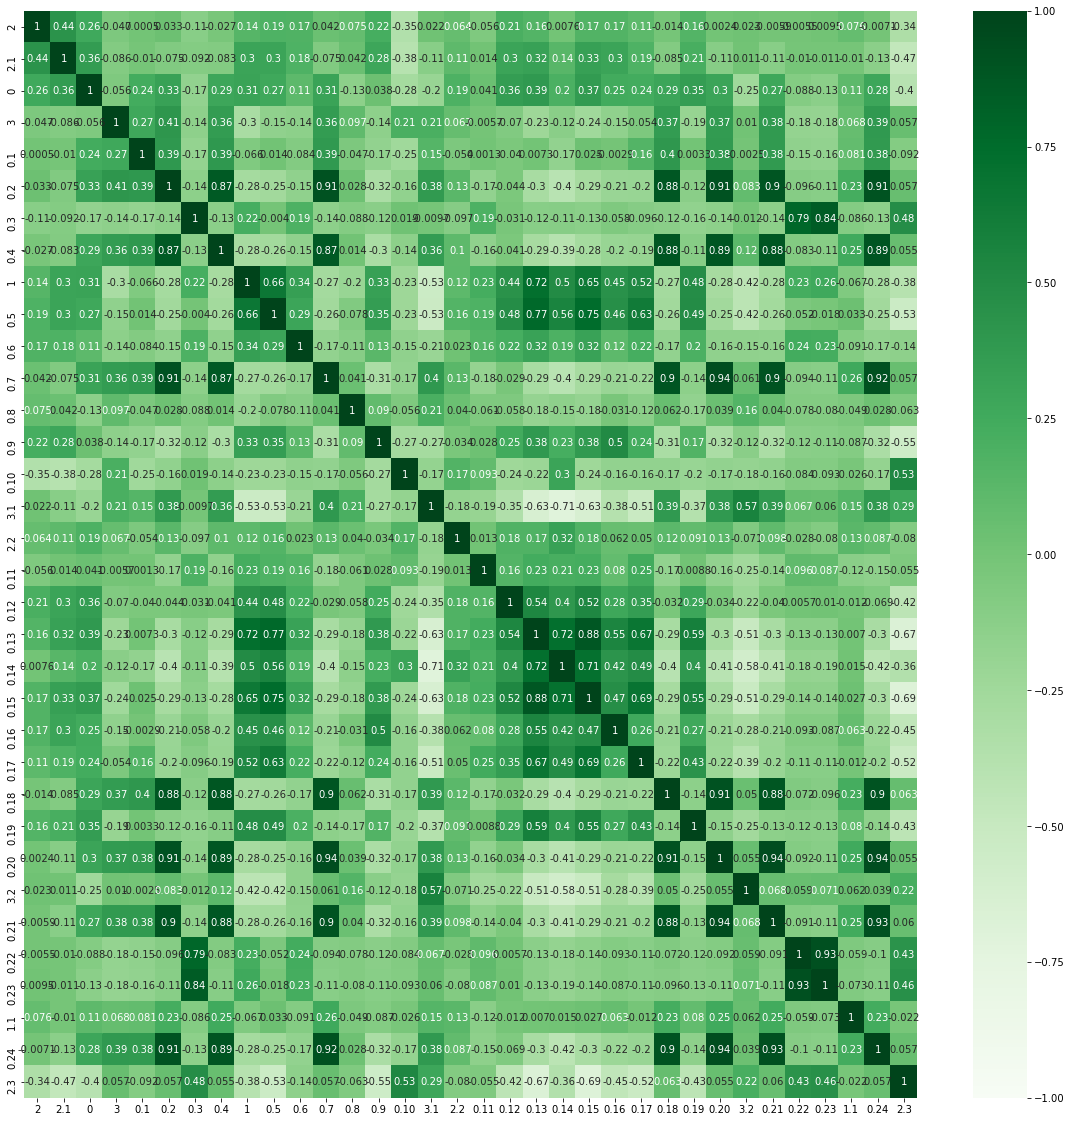

In [245]:
# Gráfica 1: muestra la relación entre las variables
graf1 = plt.figure(figsize=(20,20))
sns.heatmap(dataderma.corr(),annot=True,cmap='Greens',vmax=1.0,vmin=-1.0)

<AxesSubplot:>

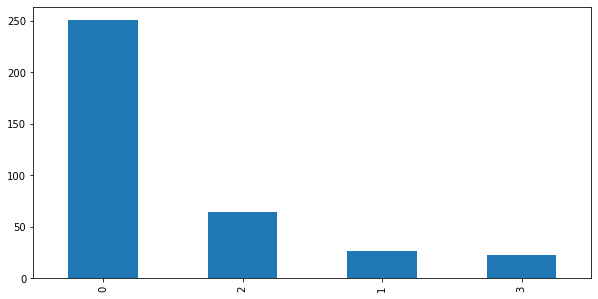

In [346]:
# Gráfica 2: ver la distribución por columna, eritema  
fig, ax1 = plt.subplots(1, 1, figsize= (10, 5))
dataderma['1'].value_counts().plot(kind='bar', ax=ax1)


Interpretación: 

1 = eritema: enrrojecimiento de la piel por procesos inflamatorios

toma valores  0, 1, 2, 3, o se idica lo contrario

0 indicates that the feature was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative intermediate values

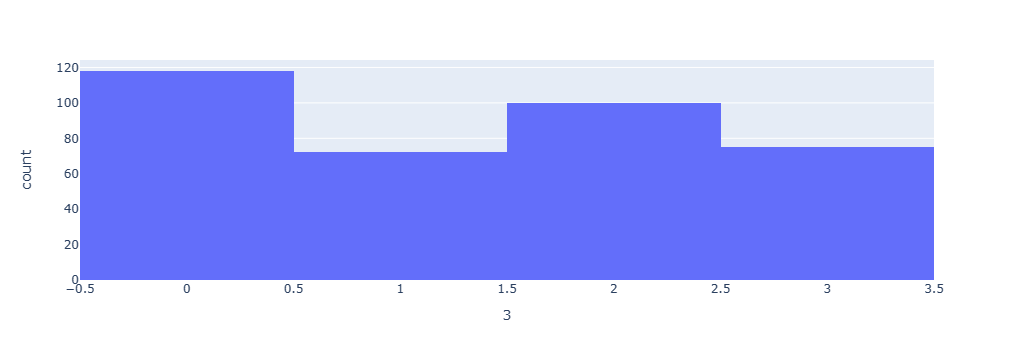

In [371]:
import numpy as np
init_notebook_mode(connected=True)
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# Gráfica 3: ver la distribución por columna, definite borders [5]
dataderma2 = dataderma.loc[:,["3"]]
fig = px.histogram(dataderma2, x="3")
fig.show()

# Ejercio 9
Agrupamiento óptimo con objetivo binario

Discretizar una VAR: proceso de transformar una variable numérica en una categórica

eje: convertir una variable como “1” en categóricas como “20-30”, “60-79” 

ayuda a reducir el ruido, ayuda a mejorar el ajuste de modelos predictivos

identifica los outliers, valores perdidos de variables numéricas 

-Quita la linealidad 

-Discretizar las variables continuas 

-mayor 0.5 = VAR sobrepedredictora

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer 

In [3]:
# se convierte el archivo en un DF
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst radius  worst texture  \
0                   0.07871  ...        25.380          17.33   
1                   0.05667  ...        24.990          23.41   
2                   0.05999  ...        23.570          25.53   
3                   0.09744  ...        14.910          26.50   
4                   0.05883  ...        22.540          16.67   
..                      ...  ...           ...            ...   
564                 0.05623  ...        25.450          26.40   
565                 0.05533  ...        23.690          38.25   
566                 0.05648  ...        18.980          34.12   
567                 0.07016  ...        25.740          39.42   
568                 0.05884  ...         9.456          30.37   

     worst perimeter  worst area  worst smoothness  worst compactness  \
0             184.60      2019.0           0.16220            0.66560   
1             158.80      1956.0           0.12380            0.18660   
2             152.50      1709.0           0.14440            0.42450   
3              98.87       567.7           0.20980            0.86630   
4             152.20      1575.0           0.13740            0.20500   
..               ...         ...               ...                ...   
564           166.10      2027.0           0.14100            0.21130   
565           155.00      1731.0           0.11660            0.19220   
566           126.70      1124.0           0.11390            0.30940   
567           184.60      1821.0           0.16500            0.86810   
568            59.16       268.6           0.08996            0.06444   

     worst concavity  worst concave points  worst symmetry  \
0             0.7119                0.2654          0.4601   
1             0.2416                0.1860          0.2750   
2             0.4504                0.2430          0.3613   
3             0.6869                0.2575          0.6638   
4             0.4000                0.1625          0.2364   
..               ...                   ...             ...   
564           0.4107                0.2216         

In [5]:
# elegir una VAR a discretizar y el objetivo binario
variable = "mean radius"
x = df[variable].values            # devuelve una lista con los valores columna seleccionada "mean radius"
y = data.target                                 

In [6]:
# importar función para optimización
from optbinning import OptimalBinning

In [7]:
# se aplica optimización a "mean radius" 
optb = OptimalBinning(name=variable, dtype="numerical", solver="cp")

In [8]:
# se ajusta el agrupamiento óptimo con matrices 
optb.fit(x, y)

OptimalBinning(name='mean radius')

In [9]:
# verificar si se encontró una solución óptima
optb.status

'OPTIMAL'

In [10]:
# da los puntos de verificación óptima
optb.splits

array([11.42500019, 12.32999992, 13.09499979, 13.70499992, 15.04500008,
       16.92500019])

In [11]:
# el resultado es una tabla de agrupamientos óptimos y varias métricas
binning_table = optb.binning_table
type(binning_table)


optbinning.binning.binning_statistics.BinningTable

In [12]:
#  el método build, da un DF con la talba anterior
binning_table.build()

Bin  Count  Count (%)  Non-event  Event  Event rate  \
0        (-inf, 11.43)    118   0.207381          3    115    0.974576   
1       [11.43, 12.33)     79   0.138840          3     76    0.962025   
2       [12.33, 13.09)     68   0.119508          7     61    0.897059   
3       [13.09, 13.70)     49   0.086116         10     39    0.795918   
4       [13.70, 15.05)     83   0.145870         28     55    0.662651   
5       [15.05, 16.93)     54   0.094903         44     10    0.185185   
6         [16.93, inf)    118   0.207381        117      1    0.008475   
7              Special      0   0.000000          0      0    0.000000   
8              Missing      0   0.000000          0      0    0.000000   
Totals                    569   1.000000        212    357    0.627417   

             WoE        IV        JS  
0       -3.12517  0.962483  0.087205  
1      -2.710972  0.538763  0.052198  
2      -1.643814  0.226599  0.025513  
3      -0.839827  0.052131  0.006331  
4      -0.153979  0.003385  0.000423  
5       2.002754  0.359566  0.038678  
6       5.283323  2.900997  0.183436  
7            0.0  0.000000  0.000000  
8            0.0  0.000000  0.000000  
Totals            5.043925  0.393784

Al finalizar el procesos del binning, se tiene una tabla que muestra la clasificación de los datos y varias métricas para cada clasificación, donde:

# 1. IV = Information Value para cada grupo (divergencia simétrica de Kullback-Leibler o divergencia de Jeffrey).

Divergencia = distancia 

Sirve para reconocer patrones o seleccionar variables importantes en un modelo predictivo

Es una técnica de optimización con un logaritmo b2 o binario.

Es un indicador o medida de la similitud (o diferencia) entre dos funciones de distribución de probabilidad simétrica de un conjunto finito de tamño *n*.

Da puntuaciones entre 0 = idéntico y 1 = máxima diferencia

[1], [2], [3]

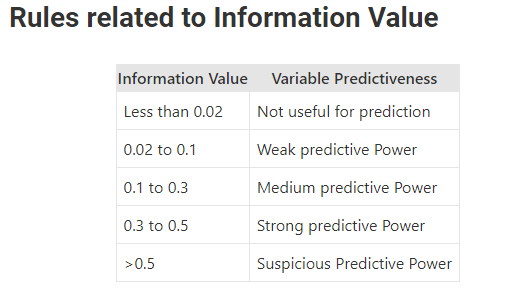

Information Value and Weight of Evidence Analysis - Arturo

https://docs.tibco.com/pub/sfire-dsc/6.5.0/doc/html/TIB_sfire-dsc_user-guide/GUID-07A78308-525A-406F-8221-9281F4E9D7CF.html


# 2. WoE = the Weight-of-Evidence for each bin (peso de la evidencia para cada grupo)

WoE = indica el poder predictivo de una variable independiente en relación con la variable dependiente

Ayuda a transformar una variable independiente continua en un conjunto de grupos basados en la similitud de la distribución de variables dependientes, es decir, el número de eventos y no eventos.

WOE positivo = mayor probabilidad que ocurra el evento (paga préstamo)

WOE negativo = mayor probabilidad que ocurra lo contrario (no paga préstamo) 

[4]


# Ejercicio 10


In [424]:
import numpy as np
numeros =np.random.randint(1,18 , [10])
print (numeros)
wMay = numeros[0]
for x in numeros:
    if wMay > x:
        #print("Buscando..")
        wMay = wMay
    else:
        wMay = x

print("El mayor es..: "+str(wMay))

[10  5 10 12  1  8  4  3 17  5]
El mayor es..: 17


#### -----------------------------------------------

[1] https://encyclopediaofmath.org/wiki/Jeffreys_distance

[2] https://machinelearningmastery.com/divergence-between-probability-distributions/

[3] https://www.listendata.com/2015/03/weight-of-evidence-woe-and-information.html

[4] https://towardsdatascience.com/churn-analysis-information-value-and-weight-of-evidence-6a35db8b9ec5#9557

[5] https://pharos.sh/uso-de-la-biblioteca-plotly-para-la-visualizacion-interactiva-de-datos-en-python/